# UNHCR Refugee Data (from Kaggle)

We look at a UNHCR Refugees Dataset from Kaggle. The relevance of our investigation is explained by the worldwide refugee crisis worldwide. A priori we have the desire to answer the following questions:
`1.` Which countries are most refugees from over the time?
`2.` Which countries receive the greatest amount of refugees over the time?
`3.` How is situation in Germany/Europe?
`4.` How many refugees does Europe realy receive compared to the rest of the world?

Later we will answer more specific questions and explore connections between the different datasets. For example we will try to predict the outcome of an asylum request, by using different explanatory variablse.

## Gather Data

First we import our basic packages:

In [123]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
%matplotlib inline
import math

Then we load the datafiles into our Jupyter Notebook.

In [124]:
zf = zipfile.ZipFile('C:/Users/User/Desktop/refugee-data.zip')
seekers = pd.read_csv(zf.open('asylum_seekers.csv'))

C:\Users\User\Anaconda3\envs\py3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [125]:
demographics = pd.read_csv(zf.open('demographics.csv'))

In [126]:
concern = pd.read_csv(zf.open('persons_of_concern.csv'))

C:\Users\User\Anaconda3\envs\py3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (3,4,5,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [127]:
resettlement = pd.read_csv(zf.open('resettlement.csv'))

In [128]:
time_series = pd.read_csv(zf.open('time_series.csv'))

C:\Users\User\Anaconda3\envs\py3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Assess Data and define issues for later cleansing

We asses the data and start with the first table, which is the seekers file.

## Seekers File:

First we look at the table, by sampling 10 entries:

In [129]:
seekers.sample(10)

,Year,Country / territory of asylum/residence,Origin,RSD procedure type / level,Tota pending start-year,of which UNHCR-assisted(start-year),Applied during year,decisions_recognized,decisions_other,Rejected,Otherwise closed,Total decisions,Total pending end-year,of which UNHCR-assisted(end-year)
101067,2014,Kenya,Ethiopia,U / FI,5284,5284,2699,372,0,316,7295,7983,0,0
123129,2016,Germany,Guatemala,G / NA,*,NaN,*,NaN,NaN,NaN,NaN,NaN,6,0
107182,2014,Greece,Uganda,G / FI,1,0,10,2,0,2,4,8,7,0
97420,2013,Australia,Ukraine,G / AR,6,0,5,0,0,7,1,8,3,0
107705,2014,Poland,Stateless,G / FI,28,0,29,22,1,2,19,44,18,0
6980,2001,France,Georgia,G / FI,0,0,1067,36,0,525,0,561,0,0
63052,2009,"China, Hong Kong SAR",Togo,U / AR,2,0,7,0,0,4,1,5,4,4
50056,2008,Spain,Argentina,G / FI,0,0,8,0,0,1,2,3,0,0
26582,2004,United States of America,Latvia,G / IN,70,0,23,7,0,21,7,35,58,0
117833,2015,United States of America,Turkmenistan,G / EO,26,NaN,4,5,NaN,NaN,NaN,5,35,NaN


Then we create a copy, to leave the original data unchanged and continue to work on this copy.

In [130]:
seekers_clean = seekers.copy()

We look at the column names:

In [131]:
seekers.keys()

Index(['Year', 'Country / territory of asylum/residence', 'Origin',
       'RSD procedure type / level', 'Tota pending start-year',
       'of which UNHCR-assisted(start-year)', 'Applied during year',
       'decisions_recognized', 'decisions_other', 'Rejected',
       'Otherwise closed', 'Total decisions', 'Total pending end-year',
       'of which UNHCR-assisted(end-year)'],
      dtype='object')

For convenience we rename the column names:

In [132]:
new_column_names = seekers.keys().str.lower().str.replace(' ' , '_').str.replace('-' , '')

In [133]:
new_column_names = list(new_column_names)

In [134]:
new_column_names[1] = 'country_giving_asylum'
new_column_names[2] = 'country_of_origin'
new_column_names[3] = 'rsd_type'
new_column_names[4] = 'total_pending_startyear'
new_column_names[5] = 'unhcrassisted_startyear'
new_column_names[-1] = 'unhcrassisted_endyear'

In [135]:
dict_keys = dict(zip(seekers.keys(),new_column_names))

seekers_clean.rename(str , columns = dict_keys , inplace = True)

We look at the info table of the file, in order to check file types and to see which columns have missing values:

In [136]:
seekers_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129720 entries, 0 to 129719
Data columns (total 14 columns):
year                       129720 non-null int64
country_giving_asylum      129720 non-null object
country_of_origin          129720 non-null object
rsd_type                   129719 non-null object
total_pending_startyear    124578 non-null object
unhcrassisted_startyear    118962 non-null object
applied_during_year        126222 non-null object
decisions_recognized       119886 non-null object
decisions_other            114974 non-null object
rejected                   121615 non-null object
otherwise_closed           120850 non-null object
total_decisions            97082 non-null object
total_pending_endyear      125832 non-null object
unhcrassisted_endyear      121883 non-null object
dtypes: int64(1), object(13)
memory usage: 14.8+ MB


How many entries per year are included in the data?

In [137]:
seekers_clean.year.value_counts()

2015    11225
2016    10461
2014     9908
2013     9259
2012     8644
2011     8299
2010     7905
2009     7159
2008     7042
2007     6924
2005     6721
2006     6656
2004     6601
2003     6359
2002     5862
2001     5542
2000     5153
Name: year, dtype: int64

How many countries give asylum according to the data?

In [138]:
seekers_clean.country_giving_asylum.nunique()

190

How many originate countries are there, according to the data?

In [139]:
seekers_clean.country_of_origin.nunique()

222

### Define issues for later cleansing

###### - Quality Issues 

- Problem: Some entries are * for example row 126057
- Problem: row 4898 Viet Nam ({\color{red} edit: this is not a problem})
- `total_decisions` is NaN

######  - Tidiness Issues

- Problem: Column names are inconvenient
- Problem: RSD types?

#### - Further Issues and explanations:

For each country, asylum applications examined through the refugee status determination (RSD) process may be classified by:
- `1.` Type of procedure: U=UNHCR; G=Government; J=Joint procedure and
- `2.` Level in the procedure: FI=First instance; FA=First instance and appeal; AR=Appeal

## Demographics File:

We take a look at the demographics table:

In [140]:
demographics.sample(2)

,Year,Country / territory of asylum/residence,Location Name,Female 0-4,Female 5-11,Female 5-17,Female 12-17,Female 18-59,Female 60+,F: Unknown,F: Total,Male 0-4,Male 5-11,Male 5-17,Male 12-17,Male 18-59,Male 60+,M: Unknown,M: Total
11730,2013,Mali,Tombouctou : Region,321,568,NaN,245,1080,126,0.0,2340,359,546,NaN,268,985,119,0.0,2277
11499,2013,Guinea-Bissau,Papia,21,28,NaN,13,54,8,0.0,124,18,36,NaN,20,36,3,0.0,113


To modify this file we first create a copy

In [141]:
demographics_clean = demographics.copy()

How many unique countries of origin and countries giving asylum are there?

In [142]:
seekers_clean.country_of_origin.nunique()

222

In [143]:
demographics_clean['Country / territory of asylum/residence'].nunique()

191

For convenience we rename the columns

In [144]:
new_column_names = demographics.keys().str.lower().str.replace(' ' , '_').str.replace(':' , '')

new_column_names = list(new_column_names)

new_column_names[1] = 'country_giving_asylum'

new_column_names

['year',
 'country_giving_asylum',
 'location_name',
 'female_0-4',
 'female_5-11',
 'female_5-17',
 'female_12-17',
 'female_18-59',
 'female_60+',
 'f_unknown',
 'f_total',
 'male_0-4',
 'male_5-11',
 'male_5-17',
 'male_12-17',
 'male_18-59',
 'male_60+',
 'm_unknown',
 'm_total']

In [145]:
dict_keys = dict(zip(demographics_clean.keys(),new_column_names))

demographics_clean.rename(str , columns = dict_keys , inplace = True)

Now we take a closer look at the table

In [146]:
demographics_clean.sample(10)

,year,country_giving_asylum,location_name,female_0-4,female_5-11,female_5-17,female_12-17,female_18-59,female_60+,f_unknown,f_total,male_0-4,male_5-11,male_5-17,male_12-17,male_18-59,male_60+,m_unknown,m_total
5627,2008,Sri Lanka,Colombo,35,45,NaN,37,163,8,NaN,288,34,55,NaN,52,225,8,NaN,374
8834,2011,Gabon,Lekindou : Point,0,2,NaN,3,11,0,NaN,16,0,4,NaN,2,5,2,NaN,13
216,2001,"China, Hong Kong SAR",Hong Kong,3,NaN,5.0,NaN,20,0,0.0,28,2,NaN,5.0,NaN,484,0,0.0,491
7852,2010,The former Yugoslav Republic of Macedonia,Kicevo : Opština - Municipality,1,0,NaN,0,19,1,0.0,21,0,4,NaN,1,10,0,0.0,15
1685,2003,Turkey,Kayseri,19,NaN,92.0,NaN,277,13,0.0,401,24,NaN,129.0,NaN,334,13,0.0,500
13378,2014,Syrian Arab Rep.,Aleppo : Mohafazah - Governorate,55,114,NaN,180,234,20,0.0,603,66,138,NaN,181,204,33,0.0,622
3280,2006,Angola,Kwanza Norte,0,NaN,NaN,8,5,0,NaN,13,1,3,NaN,7,11,0,NaN,22
18226,2016,Turkey,Burdur : Province,67,153,NaN,103,912,17,NaN,1252,102,176,NaN,121,1648,26,NaN,2073
12337,2014,Albania,Shkoder,0,0,NaN,2,2,0,0.0,4,1,0,NaN,0,3,0,0.0,4
11409,2013,Eritrea,Asmara : Point,5,4,NaN,1,9,0,0.0,19,3,5,NaN,2,8,1,0.0,19


# Define issues for later cleansing

###### - Quality Issues 

- Some entries are * for example row 16318

######  - Tidiness Issues

- ``m_unknown``,``f_unknown``, ``male_5-17``, ``female_5-17`` variables are `float` not `int`.


## Concern File:

We take a quick look at the next file

In [147]:
concern.sample(2)

,Year,Country / territory of asylum/residence,Origin,Refugees (incl. refugee-like situations),Asylum-seekers (pending cases),Returned refugees,Internally displaced persons (IDPs),Returned IDPs,Stateless persons,Others of concern,Total Population
3191,1985,Mexico,El Salvador,120000,NaN,NaN,NaN,NaN,NaN,NaN,120000
26824,2000,Viet Nam,Cambodia,15945,NaN,NaN,NaN,NaN,NaN,NaN,15945


To modify the data, we first create a copy

In [148]:
concern_clean = concern.copy()

Rename the columns

In [149]:
new_column_names = concern.keys().str.lower().str.replace(' ' , '_')

new_column_names = list(new_column_names)

new_column_names[1] = 'country_giving_asylum'

new_column_names[2] = 'country_of_origin'

new_column_names[3] = 'refugees'

new_column_names[4] = 'asylum_seekers_pending'

new_column_names[6] = 'internally_displaced_persons'

new_column_names

['year',
 'country_giving_asylum',
 'country_of_origin',
 'refugees',
 'asylum_seekers_pending',
 'returned_refugees',
 'internally_displaced_persons',
 'returned_idps',
 'stateless_persons',
 'others_of_concern',
 'total_population']

In [150]:
dict_keys = dict(zip(concern_clean.keys(),new_column_names))

concern_clean.rename(str , columns = dict_keys , inplace = True)

We take a closer look at our data

In [151]:
concern_clean.sample(10)

,year,country_giving_asylum,country_of_origin,refugees,asylum_seekers_pending,returned_refugees,internally_displaced_persons,returned_idps,stateless_persons,others_of_concern,total_population
74724,2010,United Kingdom,Cook Islands,1,NaN,NaN,NaN,NaN,NaN,NaN,1
68297,2009,Germany,Ecuador,127,3,NaN,NaN,NaN,NaN,NaN,130
80340,2011,Estonia,Turkmenistan,2,NaN,NaN,NaN,NaN,NaN,NaN,2
92652,2013,Finland,Côte d'Ivoire,14,2,NaN,NaN,NaN,NaN,NaN,16
102675,2014,Sweden,Chad,6,14,0,0.0,0.0,0,0,20
61676,2008,Belgium,Russian Federation,3981,0,NaN,NaN,NaN,NaN,NaN,3981
115152,2016,Nigeria,Afghanistan,5,0,0,0.0,0.0,0,0,5
14930,1997,Denmark,Uganda,101,NaN,NaN,NaN,NaN,NaN,NaN,101
24804,2000,"China, Hong Kong SAR",Pakistan,3,20,NaN,NaN,NaN,NaN,NaN,23
62255,2008,Switzerland,Sri Lanka,2464,1406,NaN,NaN,NaN,NaN,NaN,3870


How many countries are included in the data?

In [152]:
seekers_clean.country_of_origin.nunique()

222

In [153]:
concern_clean.country_of_origin.nunique()

222

# Define issues for later cleansing

###### - Quality Issues 

- Some entries are * for example row 115185

######  - Tidiness Issues

- ``internally_displaced_persons``,``returned_idps`` variables are `float` not `int`.


## Resettlement File:

Quick look at the data

In [154]:
resettlement.sample(2)

,Country / territory of asylum/residence,Origin,Year,Value
3653,Australia,Sri Lanka,2001,60
6535,Canada,Israel,2010,2


Create a copy

In [155]:
resettlement_clean = resettlement.copy()

Rename the columns

In [156]:
new_column_names = resettlement.keys().str.lower()

new_column_names

Index(['country / territory of asylum/residence', 'origin', 'year', 'value'], dtype='object')

In [157]:
new_column_names = list(new_column_names)

new_column_names[0] = 'country_giving_asylum'

new_column_names

['country_giving_asylum', 'origin', 'year', 'value']

In [158]:
dict_keys = dict(zip(resettlement.keys(),new_column_names))

resettlement_clean.rename(str , columns = dict_keys , inplace = True)

Take a closer look

In [159]:
resettlement_clean.sample(10)

,country_giving_asylum,origin,year,value
8625,Australia,Algeria,2016,15
8481,Norway,Uganda,2015,1
2796,United States of America,Russian Federation,1997,27072
6232,Finland,Russian Federation,2009,5
4155,Australia,Dem. Rep. of the Congo,2003,20
4744,United States of America,Rep. of Moldova,2004,1711
7433,Sweden,Saudi Arabia,2012,1
5204,Canada,Mauritania,2006,43
517,Canada,Chile,1983,91
6345,Sweden,Namibia,2009,12


# Define issues for later cleansing

There seem to be no issues. However note that there might be inconsistency at the countries names between the different datasets. We will explore this later.


## Time series File:

Quick look

In [160]:
time_series.sample(2)

,Year,Country / territory of asylum/residence,Origin,Population type,Value
53228,2004,Ecuador,Swaziland,Asylum-seekers,1
85602,2008,Switzerland,Pakistan,Asylum-seekers,49


Create a copy

In [161]:
time_series_clean = time_series.copy()

Rename columns

In [162]:
new_column_names = time_series.keys().str.lower()

new_column_names = list(new_column_names)

new_column_names[1] = 'country_giving_asylum'
new_column_names[2] = 'country_of_origin'
new_column_names[3] = 'population_type'

new_column_names 

['year',
 'country_giving_asylum',
 'country_of_origin',
 'population_type',
 'value']

In [163]:
dict_keys = dict(zip(time_series_clean.keys(),new_column_names))

time_series_clean.rename(str , columns = dict_keys , inplace = True)

Take a closer look

In [164]:
time_series_clean.sample(10)

,year,country_giving_asylum,country_of_origin,population_type,value
218459,2015,Estonia,Palestinian,Asylum-seekers,2
151769,2014,Austria,Romania,Stateless,0
227230,2015,Italy,Azerbaijan,Asylum-seekers,8
258972,2016,Canada,Yemen,Refugees (incl. refugee-like situations),390
59417,2005,Canada,Mauritania,Asylum-seekers,82
161078,2014,Cyprus,Mongolia,Returnees,0
144794,2013,Namibia,Ethiopia,Asylum-seekers,1
89796,2008,Lithuania,Turkey,Asylum-seekers,0
246272,2015,Turkey,Sudan,Others of concern,0
291115,2016,Slovenia,Syrian Arab Rep.,Returned IDPs,0


# Define issues for later cleansing

###### - Quality Issues 

- Some entries are * for example row 295557

######  - Tidiness Issues

- None

# Cleansing: 

Remember the 6 files are: seekers demographics concern resettlement time_series

In [165]:
files = [seekers_clean , demographics_clean , concern_clean , resettlement_clean , time_series_clean]

We replace '*' by 0 for every entry in each of the 6 files.

In [166]:
for file in files:
    file.replace('*' , 0 , inplace = True)

Entries that should be numbers (either float or int) are strings

In [167]:
seekers_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129720 entries, 0 to 129719
Data columns (total 14 columns):
year                       129720 non-null int64
country_giving_asylum      129720 non-null object
country_of_origin          129720 non-null object
rsd_type                   129719 non-null object
total_pending_startyear    124578 non-null object
unhcrassisted_startyear    118962 non-null object
applied_during_year        126222 non-null object
decisions_recognized       119886 non-null object
decisions_other            114974 non-null object
rejected                   121615 non-null object
otherwise_closed           120850 non-null object
total_decisions            97082 non-null object
total_pending_endyear      125832 non-null object
unhcrassisted_endyear      121883 non-null object
dtypes: int64(1), object(13)
memory usage: 14.8+ MB


We convert every entry to float, when possible

In [168]:
for col in list(concern_clean.keys()[3:]):
    concern_clean[col] = pd.to_numeric(concern_clean[col], errors='ignore' , downcast = 'integer')

In [169]:
for col in list(seekers_clean.keys()[4:]):
    seekers_clean[col] = pd.to_numeric(seekers_clean[col], errors='ignore' , downcast = 'integer')

In [170]:
for col in list(demographics_clean.keys()[3:]):
    demographics_clean[col] = pd.to_numeric(demographics_clean[col], errors='ignore' , downcast = 'integer')

# Further manipulation

We want to calculate an acceptance rate for every entry. We will do this by taking the ratio of `total_pending_endyear` and `total_pending_startyear + applied_during_year`. However we have to exclude missing values to do so and have to check, whether these entries can be excluded without deleting a huge amount of refugees.

In [171]:
seekers_clean[seekers_clean.applied_during_year.isnull()].total_pending_startyear.sum()

450856.0

In [172]:
seekers_clean[seekers_clean.total_pending_endyear.isnull()].applied_during_year.sum()

278290.0

In [173]:
seekers_clean[seekers_clean.total_pending_startyear.isnull()].total_pending_endyear.sum()

23247.0

We look at the aggregated number of refugees for comparison

In [174]:
seekers_clean.total_pending_startyear.sum()

18336070.0

In [175]:
seekers_clean.total_pending_endyear.sum()

19949408.0

In [176]:
seekers_clean.applied_during_year.sum()

18624397.0

There is a total number of entries of:

In [177]:
len(seekers_clean)

129720

Excluding rows where one of the three entries `total_pending_endyear` and `total_pending_startyear` ,`applied_during_year` is empty removes less then 1 Million refugees. Thus we can proceed doing so.

In [178]:
seekers_clean = seekers_clean[seekers_clean.applied_during_year.notnull()]

seekers_clean = seekers_clean[seekers_clean.total_pending_endyear.notnull()]

seekers_clean = seekers_clean[seekers_clean.total_pending_startyear.notnull()]

In [179]:
len(seekers_clean)

121428

We delete entries where the amount of refugees `total_pending_startyear` + `applied_during_year` is not positive.

In [180]:
seekers_clean = seekers_clean.query('applied_during_year + total_pending_startyear>0')

In [181]:
len(seekers_clean)

113293

We calculate the acceptance ratio

In [182]:
acceptance = 1 - seekers_clean['total_pending_endyear'] /(seekers_clean['applied_during_year'] + seekers_clean['total_pending_startyear'])

We convert values that are below zero to zero and values that are above 1 to 1.

In [183]:
acceptance = acceptance*(acceptance >=0)

acceptance[acceptance == 2] = 1

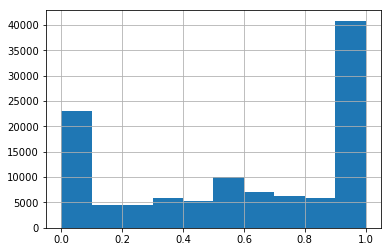

In [184]:
acceptance.hist()

In [185]:
seekers_clean['acceptance_rate'] = acceptance

In [186]:
len(seekers_clean)

113293

## We want to add a continent column

We download a continents table from the web

In [187]:
continents = pd.read_csv('https://commondatastorage.googleapis.com/ckannet-storage/2012-07-26T090250/Countries-Continents-csv.csv')

continents.columns = continents.columns.str.lower()

continents = continents[['continent' , 'country']]

continents.sample(3)

,continent,country
24,Africa,Kenya
50,Africa,Tunisia
191,South America,Suriname


### Seekers data

In [188]:
seekers_clean = seekers_clean.merge(continents , how = 'left' , left_on = 'country_of_origin' , right_on = 'country')

missing_continents_countries = seekers_clean[seekers_clean.continent.isnull()].country_of_origin.unique()

continents.continent.value_counts()

missing_continents_countries = list(missing_continents_countries)

africa = ['United Rep. of Tanzania' , 'Timor-Leste' , "Lao People's Dem. Rep." , 'Burkina Faso' , 'Central African Rep.' , "Côte d'Ivoire" , 'Dem. Rep. of the Congo' , 'Cabo Verde' , 'Western Sahara' , 'Gibraltar']

south_america = ['Puerto Rico' , 'Venezuela (Bolivarian Republic of)' , 'Bolivia (Plurinational State of)' , 'Dominican Rep.']

asia = ['Tibetan' , 'Viet Nam' , "Dem. People's Rep. of Korea" , 'Myanmar' , 'Brunei Darussalam' , 'China, Hong Kong SAR' ,  'Rep. of Korea' , 'China, Macao SAR']

europe = ['Serbia and Kosovo (S/RES/1244 (1999))' , 'Czech Rep.' , 'Rep. of Moldova' , 'The former Yugoslav Republic of Macedonia']

middle_east = ['Syrian Arab Rep.' , 'Palestinian' , 'Iran (Islamic Rep. of)' ,]

north_america = ['Cayman Islands' , 'Bermuda' , 'United States of America' , ]

stateless = ['Stateless' ]

unimportant_or_unknown = ['Bonaire', 'Sint Maarten (Dutch part)', 'Montserrat' , 'Micronesia (Federated States of)', 'Niue',
       'Turks and Caicos Islands', 'French Polynesia', 'Holy See (the)',
       'New Caledonia', 'French Guiana' , 'Various/Unknown' , 'Aruba','Cook Islands','British Virgin Islands','Curaçao','Guadeloupe','Wallis and Futuna Islands ','Svalbard and Jan Mayen','Saint-Pierre-et-Miquelon']

In [189]:


seekers_clean.sample(5)

,year,country_giving_asylum,country_of_origin,rsd_type,total_pending_startyear,unhcrassisted_startyear,applied_during_year,decisions_recognized,decisions_other,rejected,otherwise_closed,total_decisions,total_pending_endyear,unhcrassisted_endyear,acceptance_rate,continent,country
18689,2003,Egypt,Nigeria,U / FI,7.0,0.0,2.0,0.0,0.0,0.0,0.0,NaN,9.0,0.0,0.0,Africa,Nigeria
47246,2008,Sweden,Brazil,G / FI,1.0,0.0,3.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,0.5,South America,Brazil
39568,2006,Ireland,Viet Nam,G / AR,0.0,0.0,5.0,0.0,0.0,3.0,0.0,3.0,2.0,0.0,0.6,NaN,NaN
49980,2008,United Kingdom,Liberia,G / FI,0.0,0.0,20.0,0.0,3.0,12.0,11.0,26.0,0.0,0.0,1.0,Africa,Liberia
52971,2008,Thailand,Viet Nam,U / RA,3.0,3.0,1.0,0.0,0.0,3.0,1.0,4.0,0.0,0.0,1.0,NaN,NaN


In [190]:
names = ['Asia' , 'South America' , 'North America' , 'Africa' , 'Europe' , 'Middle East' , 'Stateless' , 'Various/Unknown']
for index ,region_name in enumerate([asia , south_america , north_america , africa , europe , middle_east , stateless , unimportant_or_unknown]):
    seekers_clean['continent'][np.array([x in region_name for x in seekers_clean['country_of_origin']])] = names[index]
    print(seekers_clean['continent'][np.array([x in region_name for x in seekers_clean['country_of_origin']])].isnull().mean())
    

C:\Users\User\Anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [191]:
seekers_clean[seekers_clean['continent'].isnull()]

,year,country_giving_asylum,country_of_origin,rsd_type,total_pending_startyear,unhcrassisted_startyear,applied_during_year,decisions_recognized,decisions_other,rejected,otherwise_closed,total_decisions,total_pending_endyear,unhcrassisted_endyear,acceptance_rate,continent,country


In [192]:
seekers_clean['continent_of_origin'] = seekers_clean.continent 

del seekers_clean['continent']

del seekers_clean['country']

In [193]:
seekers_clean = seekers_clean.merge(continents , how = 'left' , left_on = 'country_giving_asylum' , right_on = 'country')

In [194]:
missing_continents_countries = seekers_clean[seekers_clean.continent.isnull()].country_giving_asylum.unique()

In [195]:
continents.continent.value_counts()

Africa           54
Europe           47
Asia             44
North America    23
Oceania          14
South America    12
Name: continent, dtype: int64

In [196]:
missing_continents_countries = list(missing_continents_countries)

In [197]:
names = ['Asia' , 'South America' , 'North America' , 'Africa' , 'Europe' , 'Middle East' , 'Stateless' , 'Various/Unknown']
for index ,region_name in enumerate([asia , south_america , north_america , africa , europe , middle_east , stateless , unimportant_or_unknown]):
    seekers_clean['continent'][np.array([x in region_name for x in seekers_clean['country_giving_asylum']])] = names[index]
    print(seekers_clean['continent'][np.array([x in region_name for x in seekers_clean['country_giving_asylum']])].isnull().mean())
    

C:\Users\User\Anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0.0
0.0
0.0
0.0
0.0
0.0
nan
0.0


In [198]:
seekers_clean['continent_asylum'] =seekers_clean.continent

del seekers_clean['continent']
del seekers_clean['country']

In [199]:
seekers_clean['continent_asylum'].isnull().sum()

0

In [200]:
seekers_clean.sample(5)

,year,country_giving_asylum,country_of_origin,rsd_type,total_pending_startyear,unhcrassisted_startyear,applied_during_year,decisions_recognized,decisions_other,rejected,otherwise_closed,total_decisions,total_pending_endyear,unhcrassisted_endyear,acceptance_rate,continent_of_origin,continent_asylum
42810,2007,Denmark,Israel,G / FI,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.000,Asia,Europe
91052,2013,Uruguay,El Salvador,G / FI,3.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,4.0,2.0,0.200,North America,South America
98638,2014,Denmark,Mauritania,G / FI,1.0,0.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.000,Africa,Europe
86917,2013,Denmark,Georgia,G / AR,7.0,0.0,17.0,0.0,0.0,10.0,0.0,10.0,9.0,0.0,0.625,Europe,Europe
113042,2016,Ukraine,Uzbekistan,G / FI,24.0,24.0,36.0,0.0,0.0,19.0,10.0,30.0,30.0,30.0,0.500,Asia,Europe


### Time Series Data

In [201]:
time_series_clean['value'] = pd.to_numeric(time_series_clean['value'] , errors='ignore' , downcast = 'integer')

In [202]:
time_series_clean.sample(5)

,year,country_giving_asylum,country_of_origin,population_type,value
100408,2009,Mali,Burundi,Refugees (incl. refugee-like situations),51
54508,2004,Iceland,Lebanon,Refugees (incl. refugee-like situations),1
225778,2015,Ireland,Ecuador,Refugees (incl. refugee-like situations),1
281337,2016,Mali,Burundi,Refugees (incl. refugee-like situations),8
213026,2015,Costa Rica,Egypt,Stateless,0


In [203]:
seekers_clean.head(1)

,year,country_giving_asylum,country_of_origin,rsd_type,total_pending_startyear,unhcrassisted_startyear,applied_during_year,decisions_recognized,decisions_other,rejected,otherwise_closed,total_decisions,total_pending_endyear,unhcrassisted_endyear,acceptance_rate,continent_of_origin,continent_asylum
0,2000,Zimbabwe,Afghanistan,G / FI,0.0,0.0,5.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0,Asia,Africa


In [204]:
regions = list(seekers_clean.groupby('continent_asylum').groups.keys())

regions

['Africa',
 'Asia',
 'Europe',
 'Middle East',
 'North America',
 'Oceania',
 'South America',
 'Various/Unknown']

In [205]:
countries = list(seekers_clean.groupby('continent_asylum').get_group('Oceania').country_giving_asylum.unique())

countries

time_series_clean['continent_asylum'] = 'NaN'
time_series_clean['continent_of_origin'] = 'NaN'

time_series_clean.sample(5)

for region_name in regions:
    countries_asylum = list(seekers_clean.groupby('continent_asylum').get_group(region_name).country_giving_asylum.unique())
    countries_origin = list(seekers_clean.groupby('continent_of_origin').get_group(region_name).country_of_origin.unique())
    time_series_clean['continent_asylum'][np.array([x in countries_asylum for x in time_series_clean['country_giving_asylum']])] = region_name
    time_series_clean['continent_of_origin'][np.array([x in countries_origin for x in time_series_clean['country_of_origin']])] = region_name



time_series_clean.sample(10)

time_series_clean[time_series_clean.continent_asylum == 'NaN'].country_giving_asylum.unique()

time_series_clean['continent_asylum'][time_series_clean.country_giving_asylum == 'State of Palestine'] = 'Middle East'
time_series_clean['continent_asylum'][time_series_clean.country_giving_asylum == 'Viet Nam'] = 'Asia'
time_series_clean['continent_asylum'][time_series_clean.country_giving_asylum == 'State of Palestine'] = 'Middle East'

time_series_clean[time_series_clean.continent_of_origin == 'NaN'].country_of_origin.unique()

time_series_clean['continent_of_origin'][time_series_clean.country_of_origin == 'Stateless'] = 'Stateless'

time_series_clean.to_csv('time_series_clean.csv' , index = False)

time_series_clean.sample(15)

C:\Users\User\Anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\User\Anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\User\Anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\User\Anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A va

,year,country_giving_asylum,country_of_origin,population_type,value,continent_asylum,continent_of_origin
188271,2014,New Zealand,Myanmar,Returned IDPs,0,Oceania,Asia
38012,2002,Canada,Czech Rep.,Asylum-seekers,60,North America,Europe
52035,2004,Canada,Thailand,Asylum-seekers,9,North America,Asia
241944,2015,Senegal,Eritrea,Asylum-seekers,1,Africa,Africa
31406,2001,Belgium,Slovenia,Refugees (incl. refugee-like situations),7,Europe,Europe
239528,2015,Poland,China,Stateless,0,Europe,Asia
253926,2016,Austria,Chad,Returnees,0,Europe,Africa
103573,2009,United States of America,Indonesia,Asylum-seekers,1675,North America,Asia
52363,2004,Côte d'Ivoire,Burkina Faso,Refugees (incl. refugee-like situations),1,Africa,Africa
28444,2000,Kuwait,Stateless,Others of concern,117000,Asia,Stateless


# We add a female-male-ratio column

In [206]:
obj = demographics_clean.groupby(['year' , 'country_giving_asylum']).sum()['f_total']/(demographics_clean.groupby(['year' , 'country_giving_asylum']).sum()['m_total']+demographics_clean.groupby(['year' , 'country_giving_asylum']).sum()['f_total'])

obj = obj.reset_index()

obj = obj.rename(index=str, columns={0:'female_male_ratio'})

obj.sample(5)

,year,country_giving_asylum,female_male_ratio
1896,2015,Paraguay,0.363636
637,2006,Uruguay,0.326797
392,2004,Sierra Leone,0.528047
1109,2010,Qatar,0.507463
1378,2012,Iran (Islamic Rep. of),0.489390


In [207]:
time_series_clean = time_series_clean.merge(obj , how = 'left' , on = ['year' , 'country_giving_asylum'])

seekers_clean = seekers_clean.merge(obj , how = 'left' , on = ['year' , 'country_giving_asylum'])

In [208]:
time_series_clean.sample(2)

,year,country_giving_asylum,country_of_origin,population_type,value,continent_asylum,continent_of_origin,female_male_ratio
278304,2016,Lebanon,Togo,Others of concern,0,Asia,Africa,0.522494
197738,2014,Turkey,Myanmar,Stateless,0,Asia,Asia,0.409569


In [209]:
seekers_clean.sample(5)

,year,country_giving_asylum,country_of_origin,rsd_type,total_pending_startyear,unhcrassisted_startyear,applied_during_year,decisions_recognized,decisions_other,rejected,otherwise_closed,total_decisions,total_pending_endyear,unhcrassisted_endyear,acceptance_rate,continent_of_origin,continent_asylum,female_male_ratio
52021,2008,Uganda,Somalia,G / FI,1055.0,0.0,2499.0,1330.0,0.0,70.0,0.0,1400.0,2154.0,2154.0,0.393922,Africa,Africa,0.498368
3060,2000,Belarus,Palestinian,G / FI,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.000000,Middle East,Europe,NaN
18425,2003,Belgium,Myanmar,G / AR,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,0.000000,Asia,Europe,NaN
84695,2013,Turkey,Benin,U / AR,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,0.000000,Africa,Asia,0.432609
53420,2009,Croatia,Angola,G / FI,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.000000,Africa,Europe,0.200000


In [210]:
time_series_clean.female_male_ratio.nunique()

1774

In [211]:
len(seekers_clean)

113293

In [212]:
seekers_clean.female_male_ratio.notnull().sum()

50430

In [213]:
seekers_clean.female_male_ratio = seekers_clean.female_male_ratio.fillna(0.5)

In [214]:
seekers_clean.acceptance_rate.notnull().sum()

113293

# Statistical Investigations:

## Seekers Dataset

We calculate the acceptance rate grouped by RSD type:

In [215]:
seekers_clean['rsd_type_institution'] = seekers_clean['rsd_type'].str[0]

In [216]:
seekers_clean.groupby('rsd_type_institution').mean().acceptance_rate

rsd_type_institution
G    0.613112
J    0.324340
U    0.493975
Name: acceptance_rate, dtype: float64

Our data indicate that if the rsd procedure is 'Government', then the acceptance rate is highest. We will check if this difference in acceptance rate is significant, using a logistic regression approach. 

In [217]:
seekers_clean[['G' , 'J' , 'U']] =pd.get_dummies(seekers_clean['rsd_type_institution'])

In [218]:
seekers_clean['intercept'] = 1

Our model looks like the following. p indicates the expected acceptance rate. The RSD-levels are U (UNHCR supported) or G (Government supported) or J (Joint procedure). For the model we take G as the intercept and let both J,U be either 0,1 indicating the RSD-level.

$$\frac{p}{1-p} = e^{\beta_0*J+\beta_1*U+\beta_2}$$

In [219]:
import statsmodels.api as sm
log_regression = sm.Logit(seekers_clean['acceptance_rate'], seekers_clean[['J' , 'U' , 'intercept']]).fit()
np.exp(log_regression.params)


#The below is a workaround to fix a problem with log_regression.summary()
from scipy import stats 

stats.chisqprob = lambda chisq, seekers_clean: stats.chi2.sf(chisq, seekers_clean) 




Optimization terminated successfully.
         Current function value: 0.662994
         Iterations 4


In [220]:
log_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        acceptance_rate   No. Observations:               113293
Model:                          Logit   Df Residuals:                   113290
Method:                           MLE   Df Model:                            2
Date:                Wed, 11 Apr 2018   Pseudo R-squ.:                 0.01220
Time:                        12:10:24   Log-Likelihood:                -75113.
converged:                       True   LL-Null:                       -76040.
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
J             -1.1943      0.056    -21.159      0.000      -1.305      -1.084
U             -0.4845      0.016    -30.396      0.000      -0.516      -0.453
intercept      0.4604      0.007     68.259      0.000       0.447       0.474
==============================================================================
"""

We conclude that the ratio $\frac{p}{1-p}$ is expected to be highest, when the RSD-level is G, but this cannot be shown to be statistically significant as the R-squared value is very low.

We now test whether the acceptance rate is significantly influenced by the female to male ratio.

In [221]:
log_regression = sm.Logit(seekers_clean['acceptance_rate'] , seekers_clean[['female_male_ratio', 'intercept']]).fit()
np.exp(log_regression.params)

Optimization terminated successfully.
         Current function value: 0.669306
         Iterations 4


female_male_ratio    3.082078
intercept            0.860781
dtype: float64

In [222]:
log_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        acceptance_rate   No. Observations:               113293
Model:                          Logit   Df Residuals:                   113291
Method:                           MLE   Df Model:                            1
Date:                Wed, 11 Apr 2018   Pseudo R-squ.:                0.002791
Time:                        12:10:24   Log-Likelihood:                -75828.
converged:                       True   LL-Null:                       -76040.
                                        LLR p-value:                 2.521e-94
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
female_male_ratio     1.1256      0.065     17.435      0.000       0.999       1.252
intercept            -0.1499      0.030     -5.017      0.000      -0.208      -0.091
=====================================================================================
"""

Again this is a poor model, as the correspong R-squared value is very low.

## Time Series Dataset

We continue with the time series Data set and want to answer some questions about the data.

How many refugees have there been worldwide in the year 2016?

In [223]:
time_series_clean.query('year == 2016').value.sum()

67635713

Wow! Almost 68 Million refugees worldwide, just in 2016. How many of these refugees have tried their luck in Europe in the year 2016?

In [224]:
time_series_clean.query('continent_asylum == "Europe"').query('year == 2016').value.sum()

6812466

We calculate the respective ratio (Europe/world)

In [225]:
time_series_clean.query('continent_asylum == "Europe"').query('year == 2016').value.sum()/time_series_clean.query('year == 2016').value.sum()

0.10072291246489853

There are around 6.8 Million refugees looking for asylum in Europe in 2016. How many of those are in Germany in the same year?

In [226]:
time_series_clean.query('country_giving_asylum == "Germany"').query('year == 2016').value.sum()

1268708

The respective ratio (Germany/Europe) is:

In [227]:
time_series_clean.query('country_giving_asylum == "Germany"').query('year == 2016').value.sum()/time_series_clean.query('continent_asylum == "Europe"').query('year == 2016').value.sum()

0.18623329643039688

Around 6.8 Million of the almost 68 Million refugees worldwide look for asylum in Europe in year 2016. This is a ratio of about 10 %. Of these 6.8 Million refugees around 1.3 Million refugees apply for asylum in Germany, which is a ratio of about 18 %.

# Visualize Data

### For a full Tableau Story go to https://public.tableau.com/profile/fernandotableau#!/vizhome/RefugeeDataUN-FerTableau/RefugeesinMiddleEastandAsiabycountryoforigin